In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import random
from itertools import groupby
import scipy.stats as ss
from collections import defaultdict

In [2]:
vehicles = pd.read_csv("craigslistVehicles.csv")

Cleaning and Tansformation Data:
1. Removed null values from year column
2. Filtered year based on the range [1885, 2019]
3. Calculated age by subtracting year from 2019

In [3]:
def cleaningData(vehicles):
    vehicles = vehicles[pd.notna(vehicles['year'])]
    vehicles = vehicles[pd.notnull(vehicles['year'])]
    vehicles = vehicles[vehicles['year'] > 1885] 
    vehicles = vehicles[vehicles['year'] <= 2019] 
    vehicles["age"] = 2019 - vehicles["year"]
    return vehicles

In [4]:
df = cleaningData(vehicles)

In [18]:
def plot(X, Y_actual, Y_predicted, title):
    plt.plot(X, Y_actual, label = 'Y_True')
    plt.step(X, Y_predicted, label = 'Y_Estimated')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend(loc = 'best')
    plt.title(title)
    plt.rcParams['figure.figsize'] = (20, 8)
    plt.rcParams.update({'font.size': 18})
    plt.show()

In [6]:
def calcProb(sample_input):    
    # Calculating frequency
    pdf = defaultdict(float)
    for x in sample_input:
        pdf[x] += 1
    
    sumTillNow = 0;
    cdf = defaultdict(float)
    
    # Calculating PDF and CDF estimates
    for key, value in pdf.items():
        pdf[key] = (value * 1.0)/len(sample_input)
        sumTillNow = pdf[key] + sumTillNow;
        cdf[key] = sumTillNow;
    
    return pdf, cdf;

In [7]:
def KStest(sample_input, mu, sigma):
    sample_input = np.sort(sample_input)
    
    unique_sample_input = np.unique(sample_input)
    unique_sample_input = np.sort(unique_sample_input)
    F_x = ss.norm(mu, sigma).cdf(unique_sample_input)
    
    _, cdf = calcProb(sample_input)
    F_y_plus = np.array(list(map(float, list(cdf.values()))))
    F_y_minus = np.concatenate(([0], np.delete(F_y_plus, -1)))
    
    F_x_minus_F_y_minus = abs(F_x - F_y_minus)
    F_x_minus_F_y_plus = abs(F_x - F_y_plus)
    
    print('Max of |Fx - Fy-| and |Fx - Fy+| is', max(np.max(F_x_minus_F_y_minus), np.max(F_x_minus_F_y_plus)))
    
    plot(unique_sample_input, F_x, F_y_plus, 'KS Test: mu = ' + str(mu) + ' and sigma = ' + str(sigma))

Max of |Fx - Fy-| and |Fx - Fy+| is 0.30510531395461693


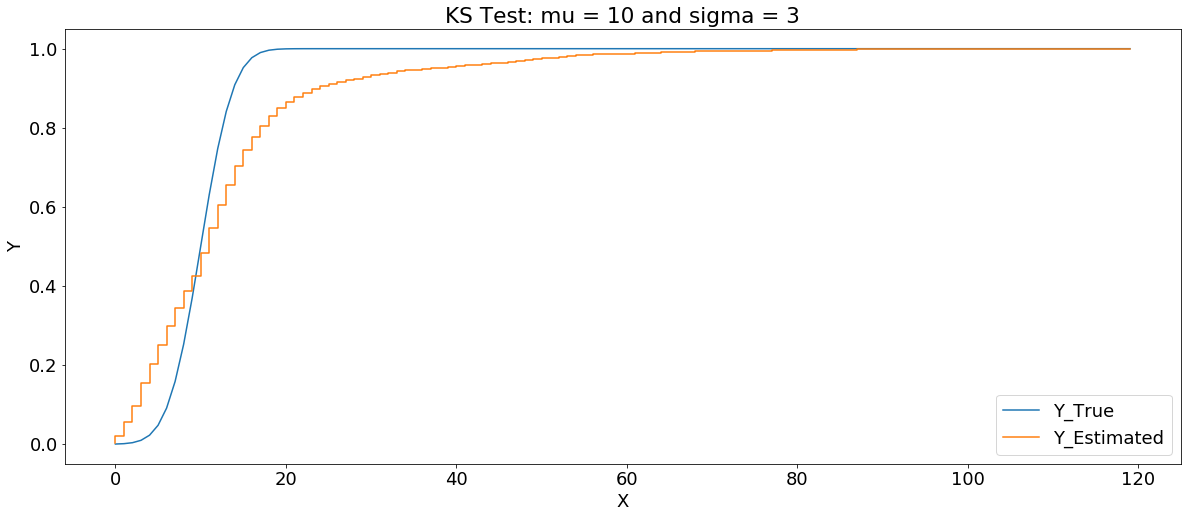

In [19]:
KStest(df['age'].values, 10, 3)

Max of |Fx - Fy-| and |Fx - Fy+| is 0.18542619678395245


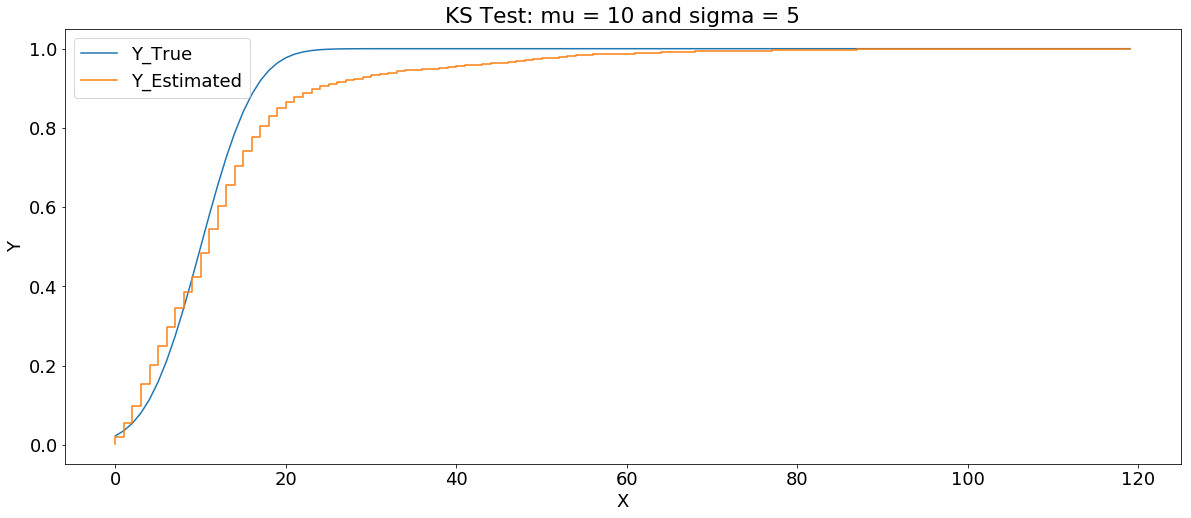

In [20]:
KStest(df['age'].values, 10, 5)

Max of |Fx - Fy-| and |Fx - Fy+| is 0.13921903353714138


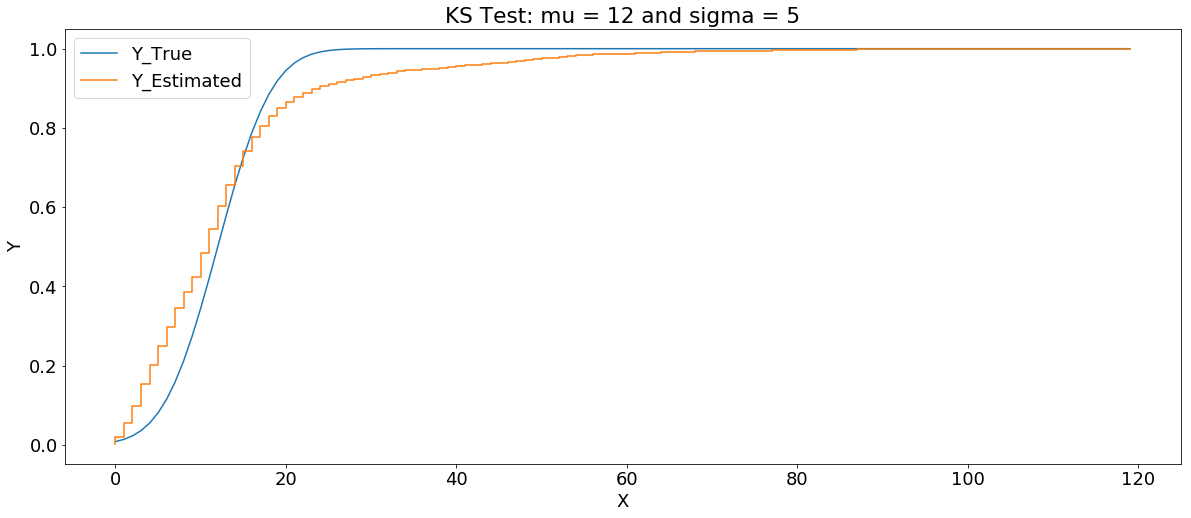

In [21]:
KStest(df['age'].values, 12, 5)